# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read data and store as df
df = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

#### Let's view the first five rows of the data and then the last five rows.

In [181]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [182]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


#### Observations

* There are **4,612 data points.**
* We observe that there are a few numerical features and **most of the features are categorical.** Let us have a closer look by using df.info().

### Data type and size information

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* There are **4,612 data points.**
* The column **'ID' contains just indices** without adding information, hence it is to be removed from data.
* The column **'status' is used as the target variable** to see if the leads are converted to sales or not.
* Hence the dataset contains **13 features**. 
* **Nine of them are categorical (string)**: current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, and referral.
* **Three of them are integers**: age, website_visits, and time_spent_on_website.
* **One of them is float**: page_views_per_visit.
* All of the features have 4,612 non-null data points, which means that **there are no missing values.**

In [184]:
# Double-checking that there are no duplicate values
df.duplicated().value_counts()

False    4612
dtype: int64

### Unique value count per feature

In [185]:
num_count = df.nunique()
print(num_count)

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


**Observations:**

- **ID is an identifier** which is unique for each customer and **we can drop this column** as it would not add any value to our analysis.
- The columns with number of unique values **less than equal to three are categorical.**
- **The rest of the columns are continuous.**

**Let's drop the 'ID' column** and define lists for numerical and categorical columns to explore them separately.

In [186]:
# Dropping the 'ID' column
df=df.drop(['ID'],axis=1)

In [187]:
# Creating numerical columns
num_col = num_count.index[num_count > 3].tolist()

# Creating categorical variables 
cat_col = num_count.index[num_count < 4].tolist()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Statistical summary of the data (Continuous features)

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Summary of categorical features

In [189]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [190]:
# Define a stacked bar plot to compare each feature's relationship to status.
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 1. Find out how current occupation affects lead status

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
----------------------------------------------------------------------------------------------------


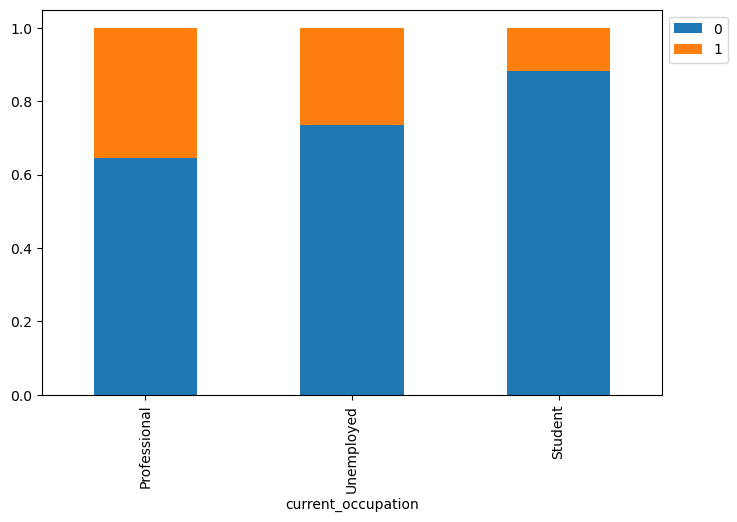

In [191]:
stacked_barplot(df, 'current_occupation', 'status')

**Observations:**

- The professional leads have the highest rate of conversion to sales.
- The student leads have the lowest rate of conversion to sales.
- One of the ways to capture more students may be offering lower price courses.

### 2. Do the first channels of interaction have an impact on the lead status?

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
----------------------------------------------------------------------------------------------------


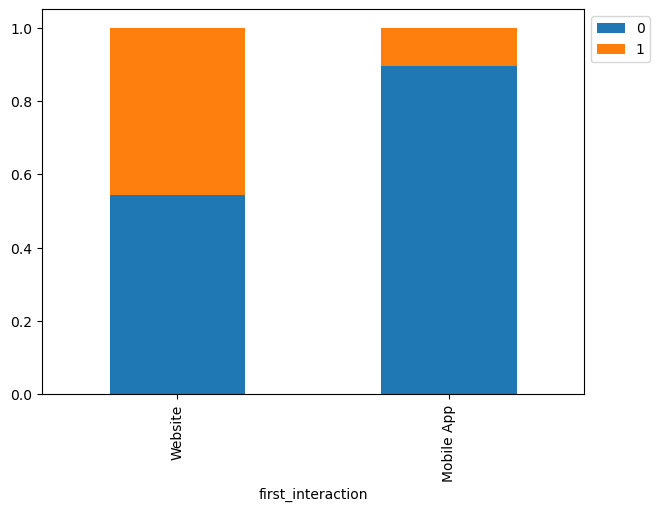

In [192]:
stacked_barplot(df, 'first_interaction', 'status')

**Observations:**

- The mode of thefirst interaction certainly has a huge impact.
- The website interaction as the first contact has a much higher rate of conversion.
- Changing some functionality of mobile app for ease of use may increase the mobile app conversion rate.
- As for advertising campaigns, some analysis and testing need to be done to examine which venue would yield better results.

### 3. Which way of interaction works best?

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
----------------------------------------------------------------------------------------------------


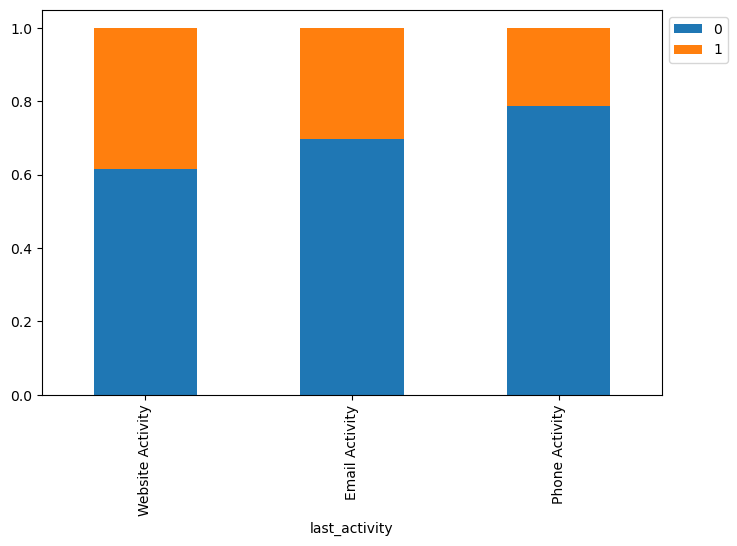

In [193]:
stacked_barplot(df, 'last_activity', 'status')

**Observations:**

- Interaction via website has the highest conversion rate at around 38%.
- Interaction via email has the conversion rate of about 30%.
- Interaction via phone has the lowest conversion rate at about 20%.

### 4. Which of these channels have the highest lead conversion rate?

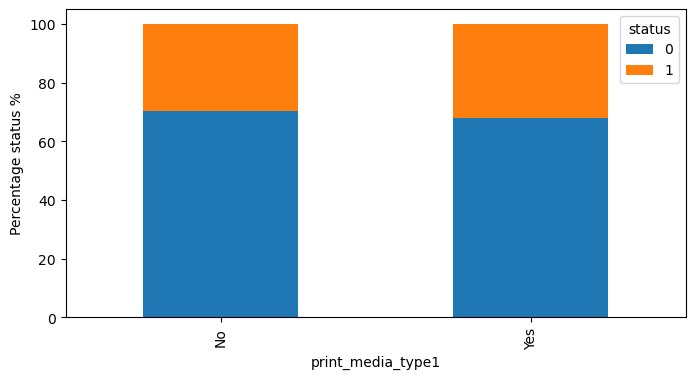

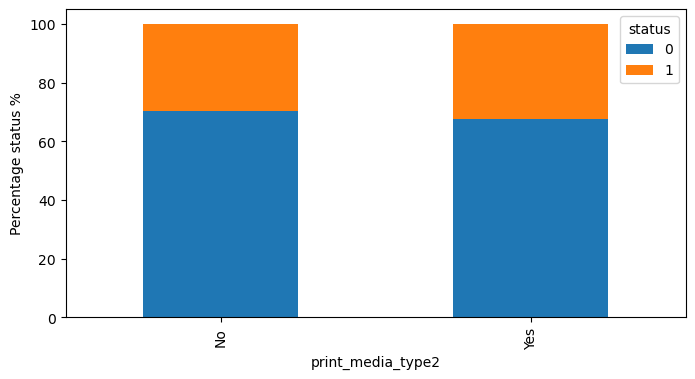

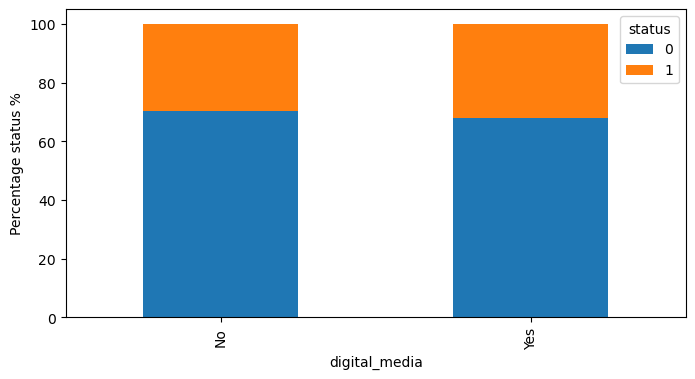

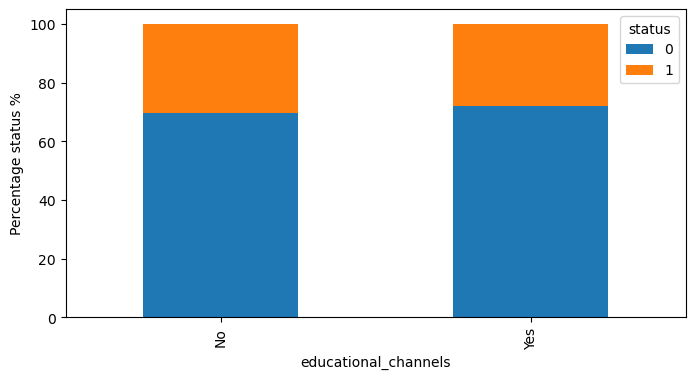

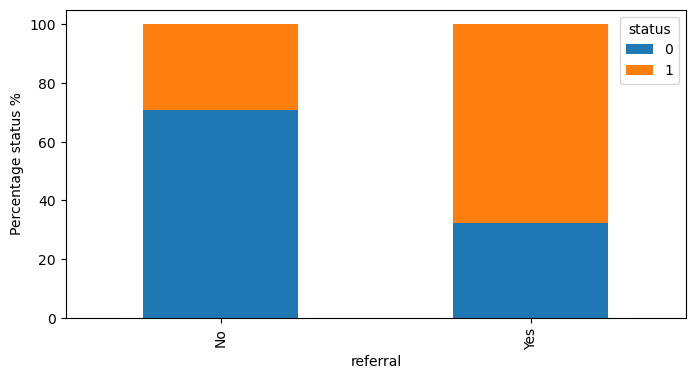

In [194]:
cat_cols = ['print_media_type1', 'print_media_type2','digital_media', 'educational_channels', 'referral', 'status']
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

**Observations**

- The leads from referrals have the highest conversion rate than the rest of the sources.

### 5. Does having more details about a prospect increase the chances of conversion?

<AxesSubplot:xlabel='profile_completed', ylabel='status'>

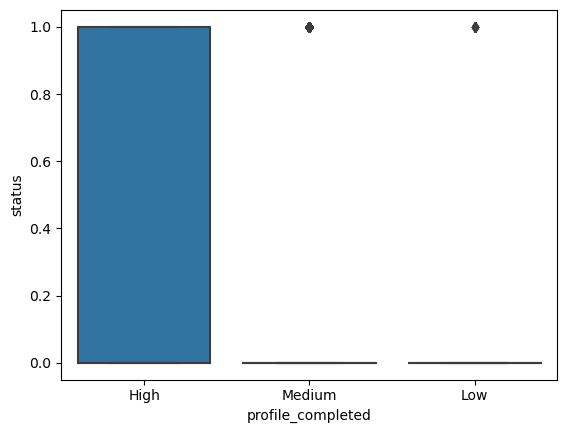

In [195]:
#profile_completed vs status
sns.boxplot(x= df['profile_completed'], y=df['status'])

**Observations:**

- The leads who go through the trouble of sharing a high level of information about themselves tend to convert to siging up.

### Univariate Analysis of Numerical Features

In [196]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations:**

- The age varies from 18 to 63 with the mean of 46 years old. The second quartile value is substantially higher than the mean at 51. This means that the students tend to be older.
- The mean number of visits is 3.57. There is a substantial difference between the third quartile value and the max value (5 vs 30). This means there are outliers including the max value. 
- The page views per visit column has the same kind of substantial difference between the third quartile value and the max. The max value surely is an outlier.

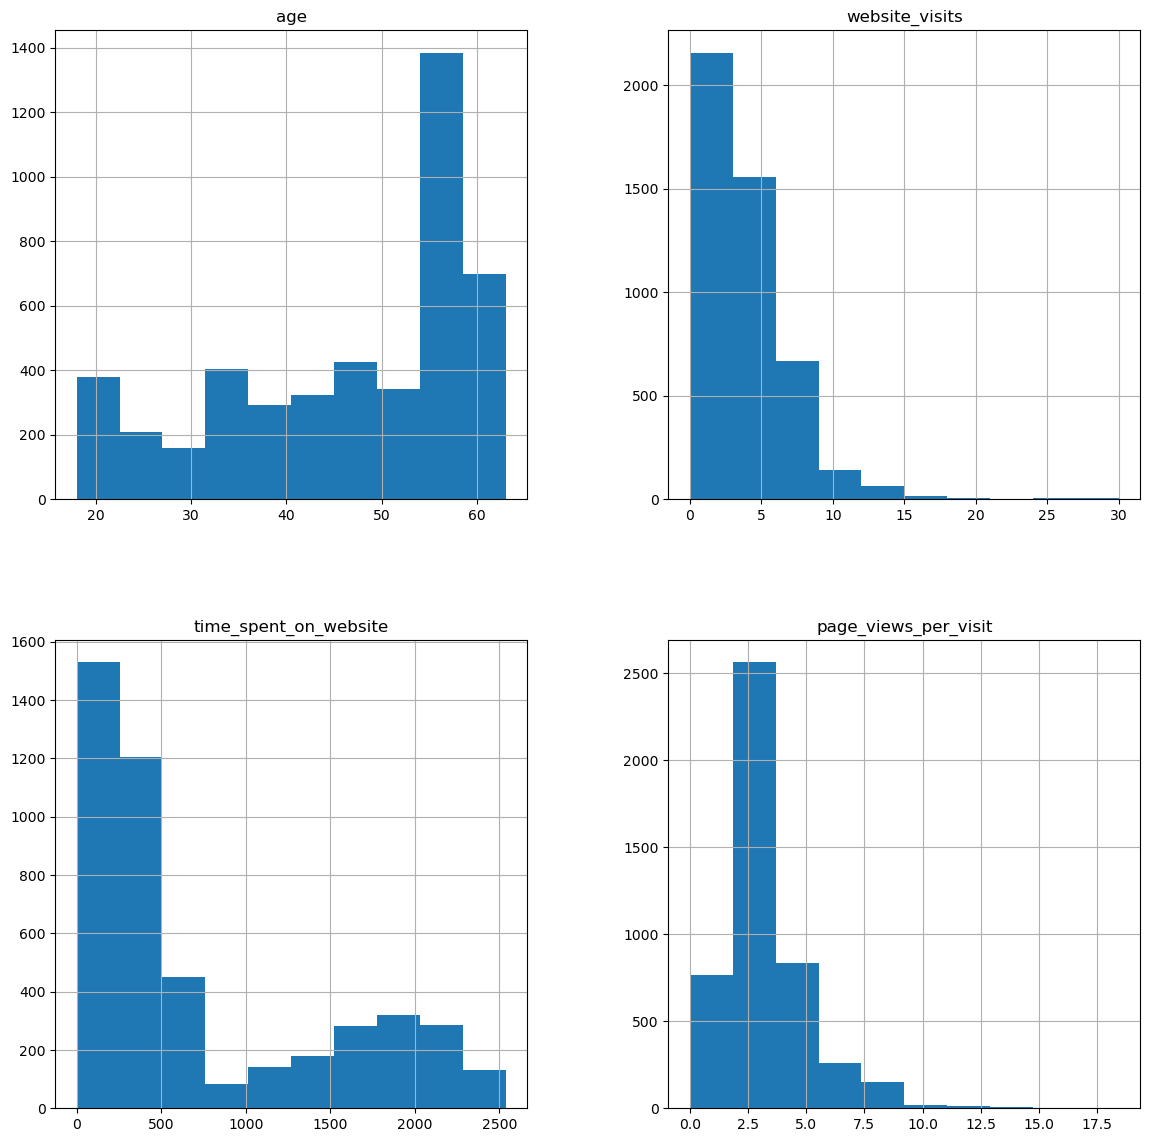

In [197]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- We observe that the highest number of students comes from the age group 54 ~ 58 (1390). The students around age 60 have the second highest frequency (700).
- Most of people visit the website less than 5 times. The number of visits more than 15 can be viewed as outliers.
- Although most of the people spent less than 750 hours on the website, the higher numbers cannot be considered as outliers.
- People spend roughly 2 ~ 4 page views per visit. Anything more than 10 can be viewed as outliers.
- Now we want to examine the outliers of 'website_visits' and 'page_views_per_visit' by examining their boxplots.

<AxesSubplot:xlabel='page_views_per_visit'>

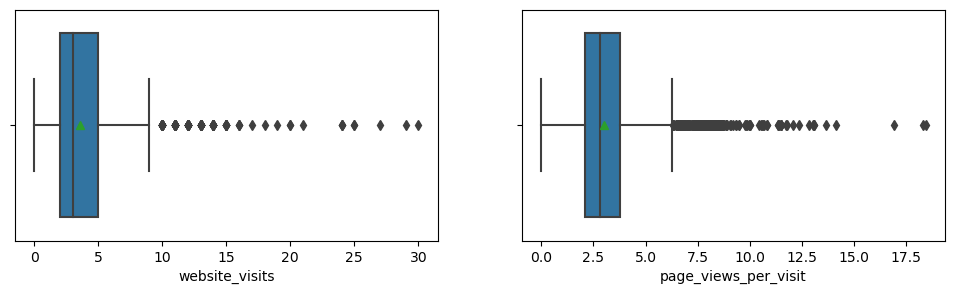

In [198]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 3))
sns.boxplot(data=df, x='website_visits', showmeans=True, ax=ax1)
sns.boxplot(data=df, x='page_views_per_visit', showmeans=True, ax=ax2)

**Observations:**

- Surely there are substantial amount of data points beyond the fourth quartile.
- Let us filter out the data points and replot 'website_visits' and 'page_views_per_visit'.

In [199]:
# Defining the hist_box() function for eah feature
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

In [200]:
# We want to filter values based on the 90 percentile and exclude the outliers
q1 = df["website_visits"].quantile(0.90)
q2 = df["page_views_per_visit"].quantile(0.90)
print(q1, q2)

7.0 5.5139000000000005


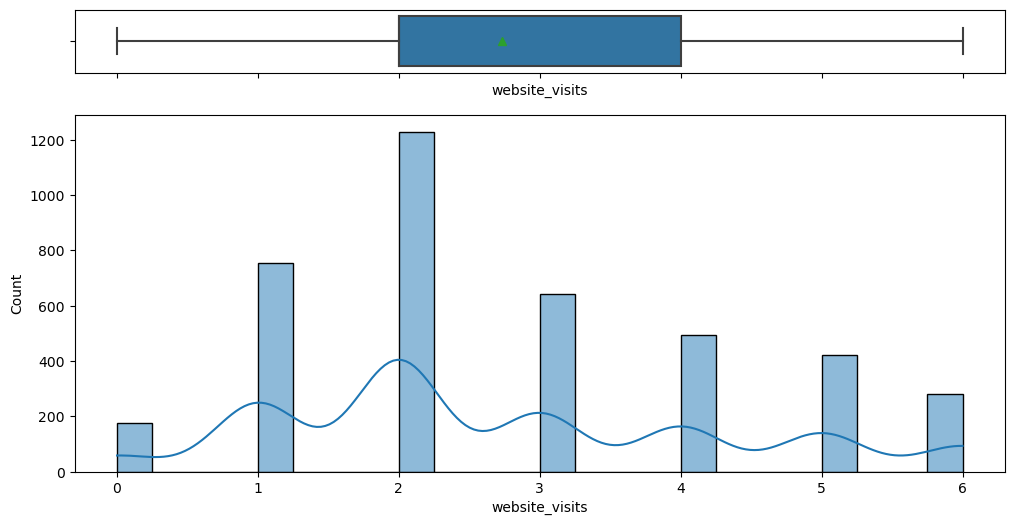

In [201]:
hist_box(df[df['website_visits'] < q1], 'website_visits')

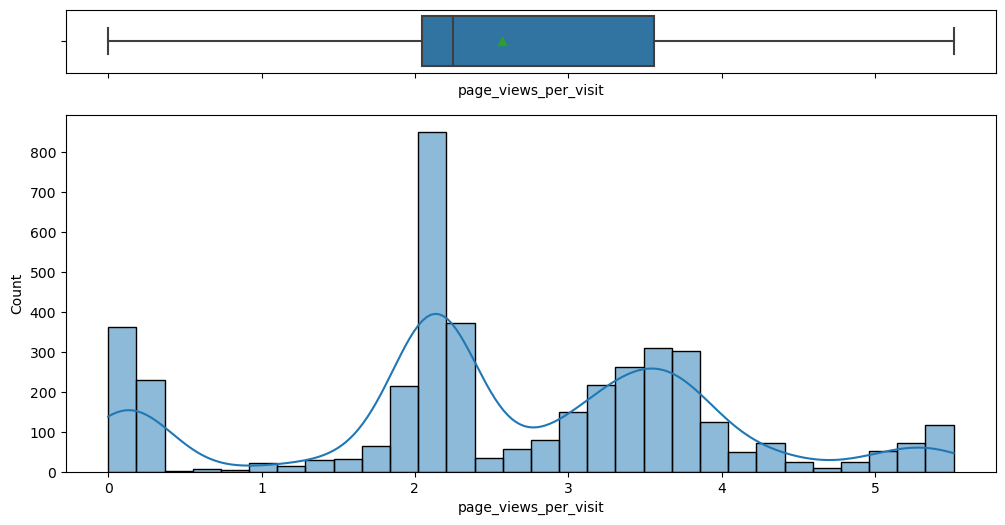

In [202]:
hist_box(df[df['page_views_per_visit'] < q2], 'page_views_per_visit')

**Observations:**

- We observe that using 90 percentile (based on experiments) removed outliers.

### **Univariate analysis for categorical variables**

In [203]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
****************************************
No     0.979835
Yes    0.020165
Name: referral, dtype: float64
****************************************
0    0.701431
1    0.298569
Name: status, dtype: float64
****************************************


**Observations:**

- **Current occupation:** Among the leads, professionals and unemployed are 49% each, while students are 12%.
- **First interaction:** There are more interactions via website at 55% than via mobile app. 
- **Profile completed:** High and medium completion of profile constitute approximately 49% while low has only 2%. There is a high level of engagement.
- **Last activity:** Interactions are mainly done via email at almost 50%.
- **Print media type1:** 10% of the leads come from newspaper advertising.
- **Print media type2:** 15% of the leads come from magazine advertising. This is more effective than newspaper.
- **Digital media:** 11% of the leads come from digital media.
- **Educational channels:** 15% of the leads come from these channels.
- **Referral:** Only 2% of the leads come from referrals.

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does status rate is related with other categorical variables.

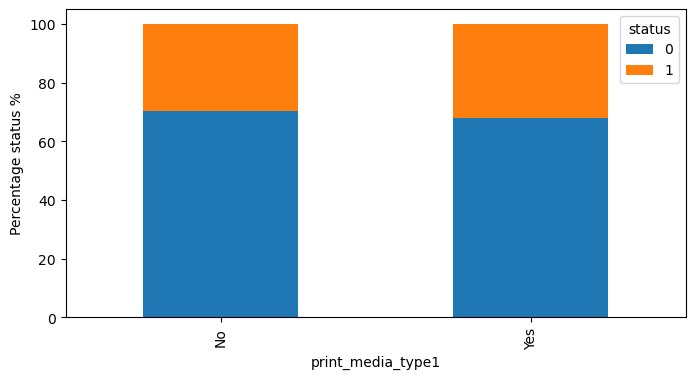

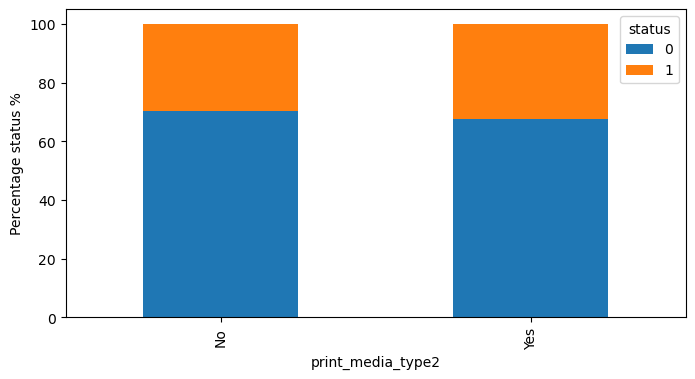

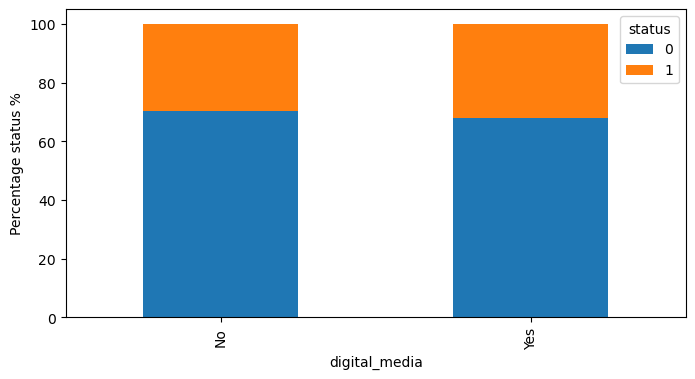

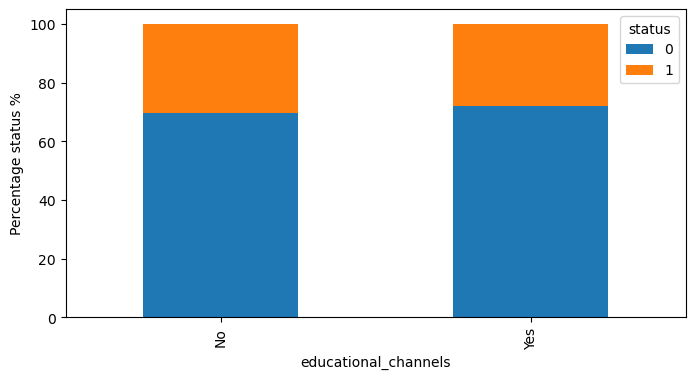

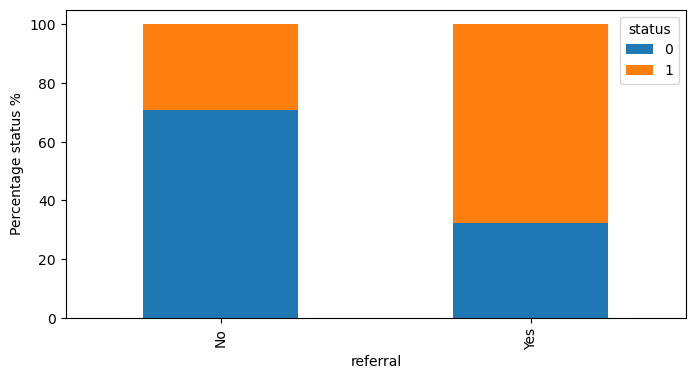

In [204]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

**Observations:**

- Among different sources of lead generation, referrals have the highest rate of conversion at around 68%.

In [205]:
# Mean of numerical variables grouped by status
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


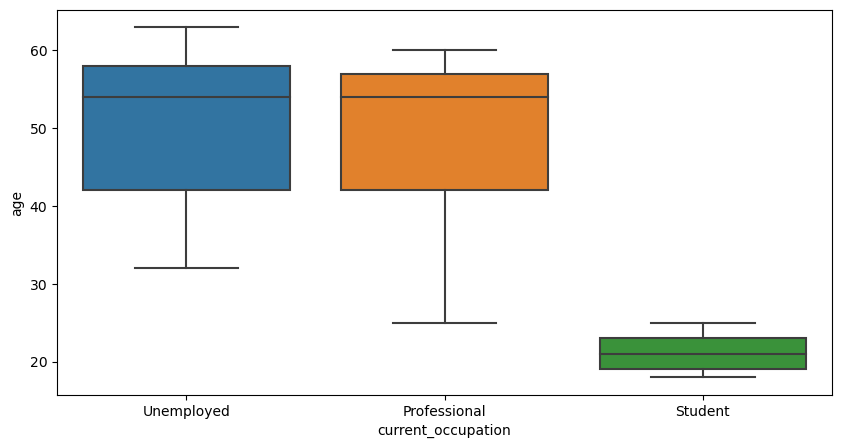

In [206]:
# Examine the relationship between current occupation and age.
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = df["current_occupation"], y = df["age"])
plt.show()

**Observations**

- The professionals and unemployed who have higher conversion rates tend to have the median age greater than 55.

<AxesSubplot:>

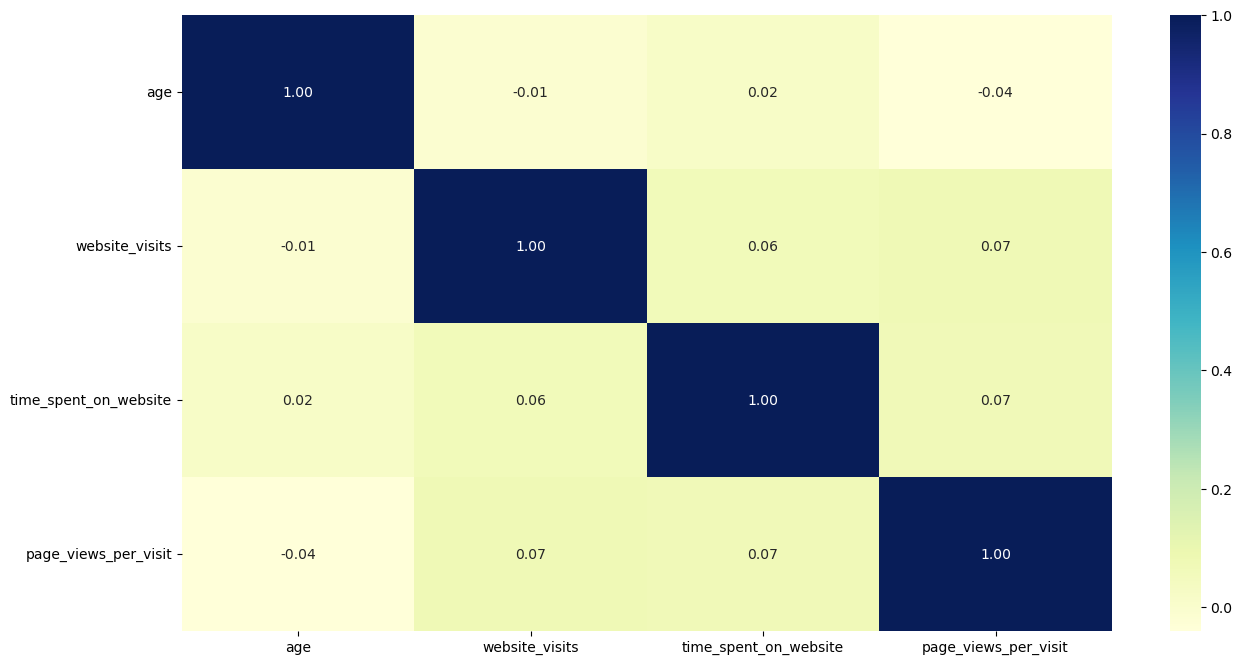

In [207]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- Very low correlations are observed among the numerical features.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### There are no missing values.

#### Outlier detection and treatment

From the features "website visits" and "page views per visit", we want to remove outliers.

In [208]:
# Removing outliers
df = df[df['website_visits'] < q1]
df = df[df['website_visits'] < q2]

# Check the size of the feature engineered data.
print(df.shape)

(3715, 14)


**Observations:**

- The number of data points got reduced from 4,612 to 3,715.

#### Feature engineering

- one-hot encoding of categorical (string type) using get_dummies.


In [128]:
# Separating target variable and other variables
X=df.drop(columns='status')
Y=df['status'] 

# Converting strings to integers
X = pd.get_dummies(X, drop_first=True) 

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### Data preparation

- converting data types of integer columns to float

In [210]:
#converting data types of integer columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [211]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Website Activity    0
print_media_type1_Yes             0
print_media_type2_Yes             0
digital_media_Yes                 0
educational_channels_Yes          0
referral_Yes                      0
dtype: int64
------------------------------
age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Websit

In [212]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [213]:
# Building and fitting decision tree model
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



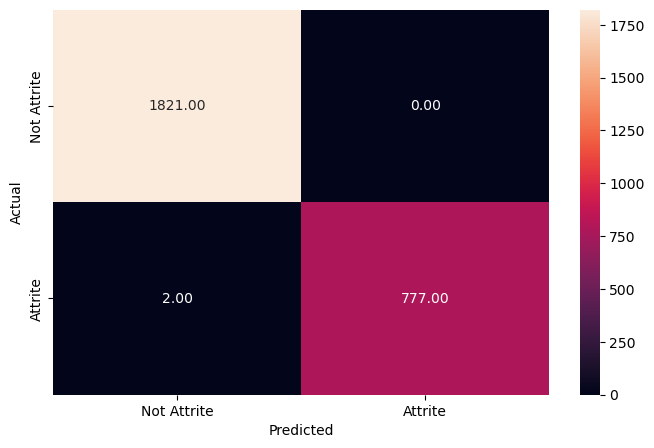

In [214]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

**Observations**

- All the metrics are 1. The model is overfitted to the train data.

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       779
           1       0.66      0.68      0.67       336

    accuracy                           0.80      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.80      0.80      0.80      1115



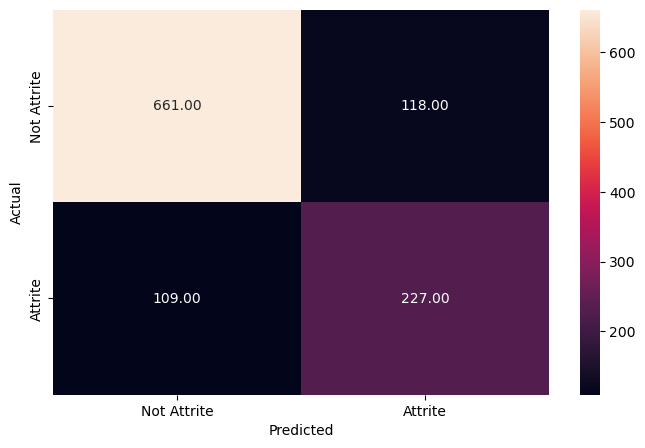

In [215]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

## Do we need to prune the tree?

In [216]:
# Importance of features in the tree building

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.250534
first_interaction_Website       0.196629
page_views_per_visit            0.138004
age                             0.107034
profile_completed_Medium        0.079665
website_visits                  0.043888
last_activity_Phone Activity    0.037361
current_occupation_Unemployed   0.034944
last_activity_Website Activity  0.023400
current_occupation_Student      0.019729
profile_completed_Low           0.017979
digital_media_Yes               0.015680
referral_Yes                    0.011850
educational_channels_Yes        0.009087
print_media_type1_Yes           0.007337
print_media_type2_Yes           0.006881


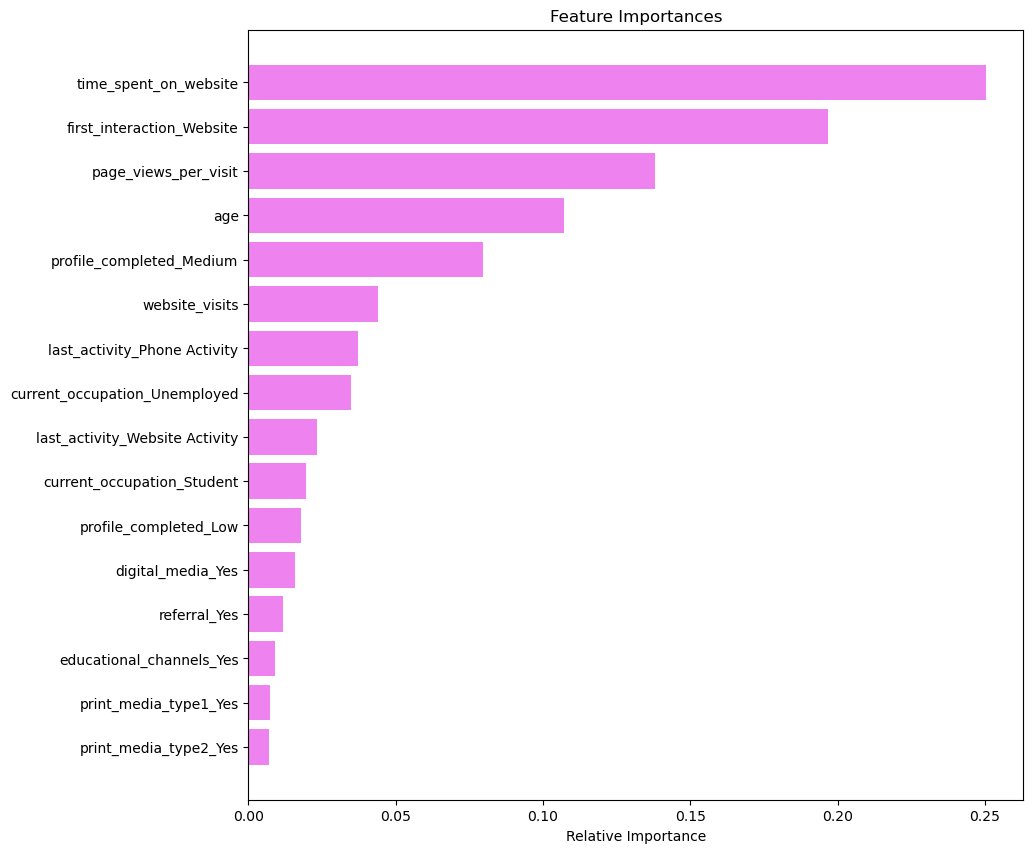

In [217]:
# Plotting the feature importance
features = list(X.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

- All the features contribute with different degrees. Maybe pruning is not necesssary. Now we find an optimal model using Grid of Parameters and check.

In [218]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1821
           1       0.61      0.91      0.73       779

    accuracy                           0.80      2600
   macro avg       0.78      0.83      0.78      2600
weighted avg       0.85      0.80      0.81      2600



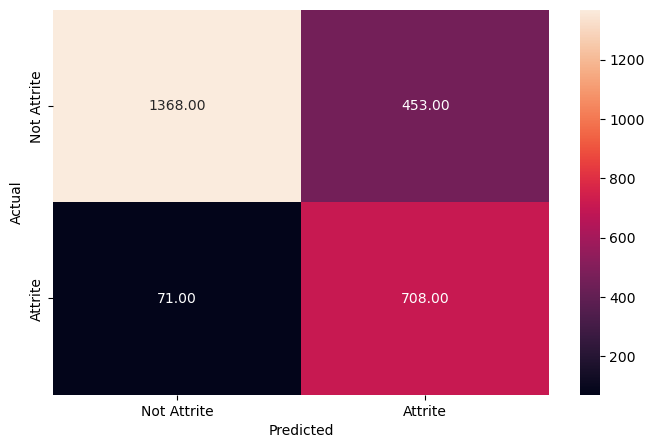

In [219]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       779
           1       0.58      0.90      0.70       336

    accuracy                           0.77      1115
   macro avg       0.76      0.81      0.76      1115
weighted avg       0.83      0.77      0.78      1115



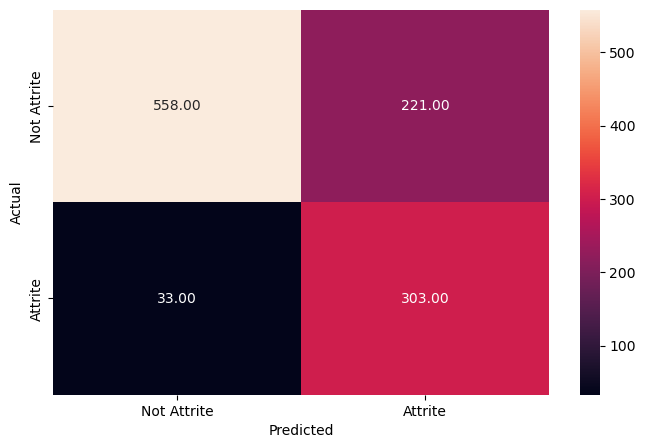

In [220]:
# Checking performance on the training data
y_pred_test = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test)

In [221]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
first_interaction_Website       0.352552
time_spent_on_website           0.317987
profile_completed_Medium        0.268561
last_activity_Phone Activity    0.030567
last_activity_Website Activity  0.029226
age                             0.001107
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


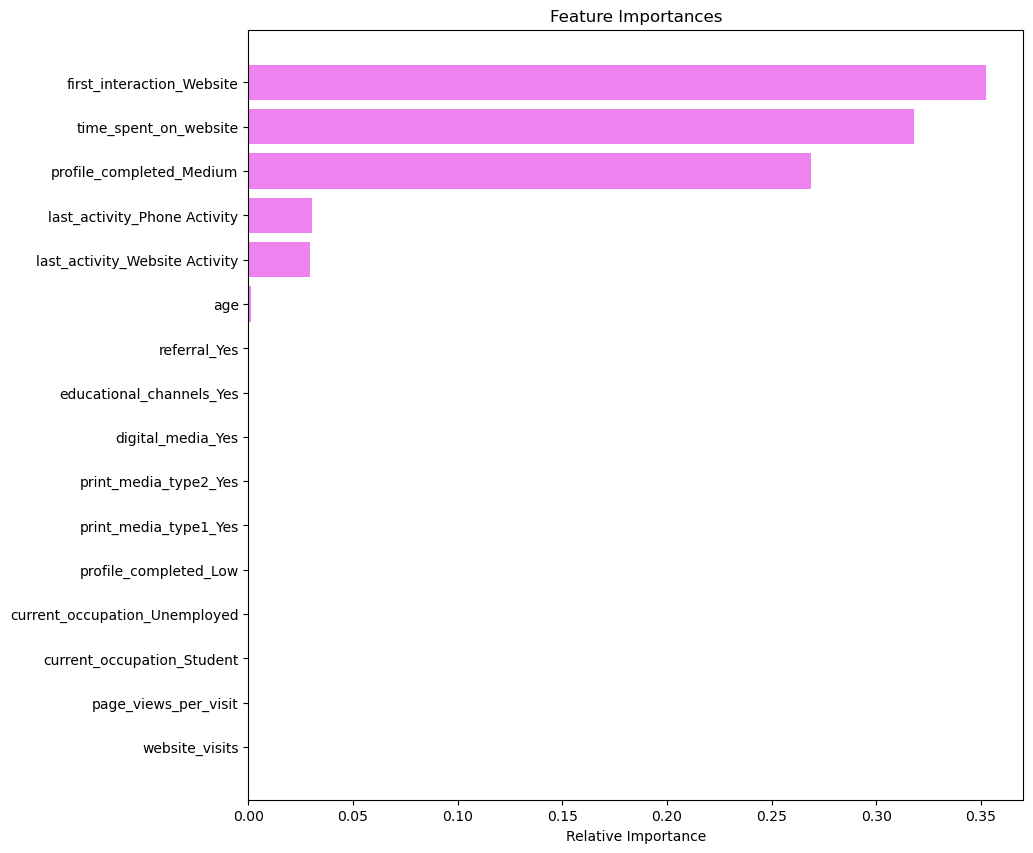

In [222]:
# Plotting the feature importance
features = list(X.columns)
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [223]:
X_pruned = df[['time_spent_on_website', 'first_interaction', 'profile_completed', 'last_activity', 'age']]

**Observations**

- Only the features 'time_spent_on_website', 'first_interaction', 'profile_completed', 'last_activity', 'age' contribute to the model. We can prune the rest of the features.

In [224]:
# Converting strings to integers
X_pruned = pd.get_dummies(X_pruned, drop_first=True) 

# Splitting the data in 70:30 ratio for train to test data
X_train_pruned, X_test_pruned, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [225]:
# Building decision tree model
dt_pruned = DecisionTreeClassifier(random_state = 1)
dt_pruned.fit(X_train_pruned, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



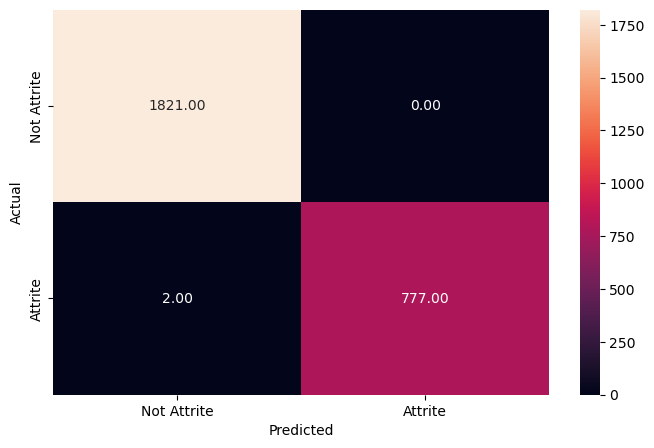

In [226]:
# Checking performance on the training dataset
y_train_pred_dt = dt_pruned.predict(X_train_pruned)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       779
           1       0.66      0.68      0.67       336

    accuracy                           0.80      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.80      0.80      0.80      1115



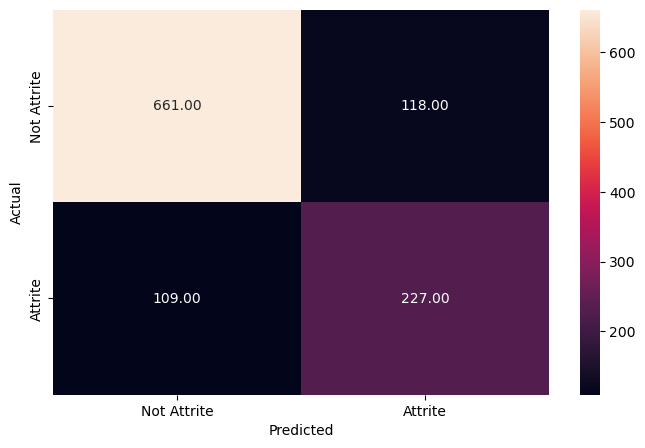

In [227]:
# Checking performance on the training dataset
y_test_pred_dt = dt_pruned.predict(X_test_pruned)
metrics_score(y_test, y_test_pred_dt)

**Observations**

- Only with 6 features, the performance on the test set is better than with 13 features. Hence, pruning is a good idea.

## Building a Random Forest model

In [228]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



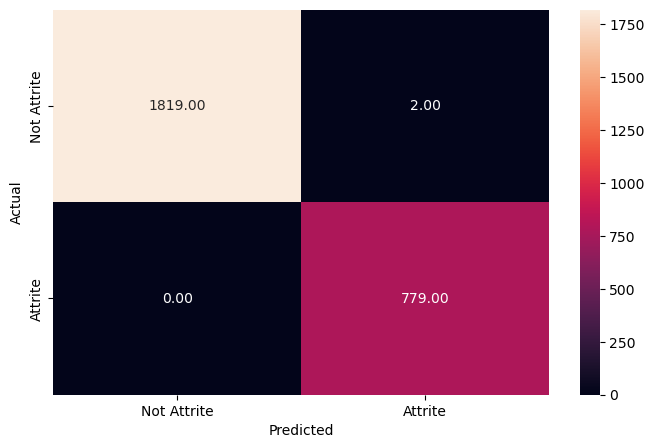

In [229]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       779
           1       0.81      0.71      0.75       336

    accuracy                           0.86      1115
   macro avg       0.84      0.82      0.83      1115
weighted avg       0.86      0.86      0.86      1115



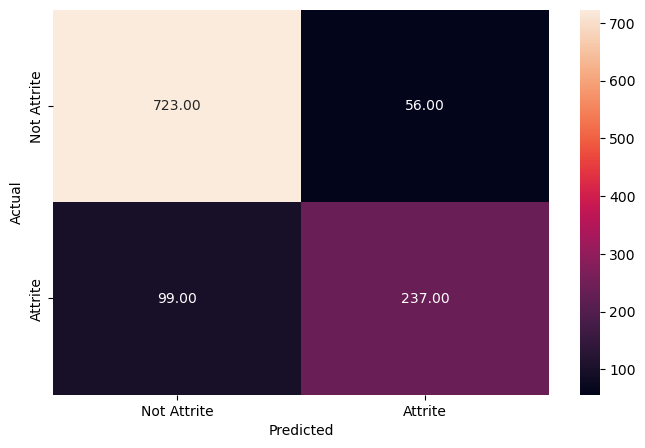

In [230]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observations**

- Even with overfitting, Random Forest Classifier performs better than Decision Tree Classifier.

## Do we need to prune the tree?

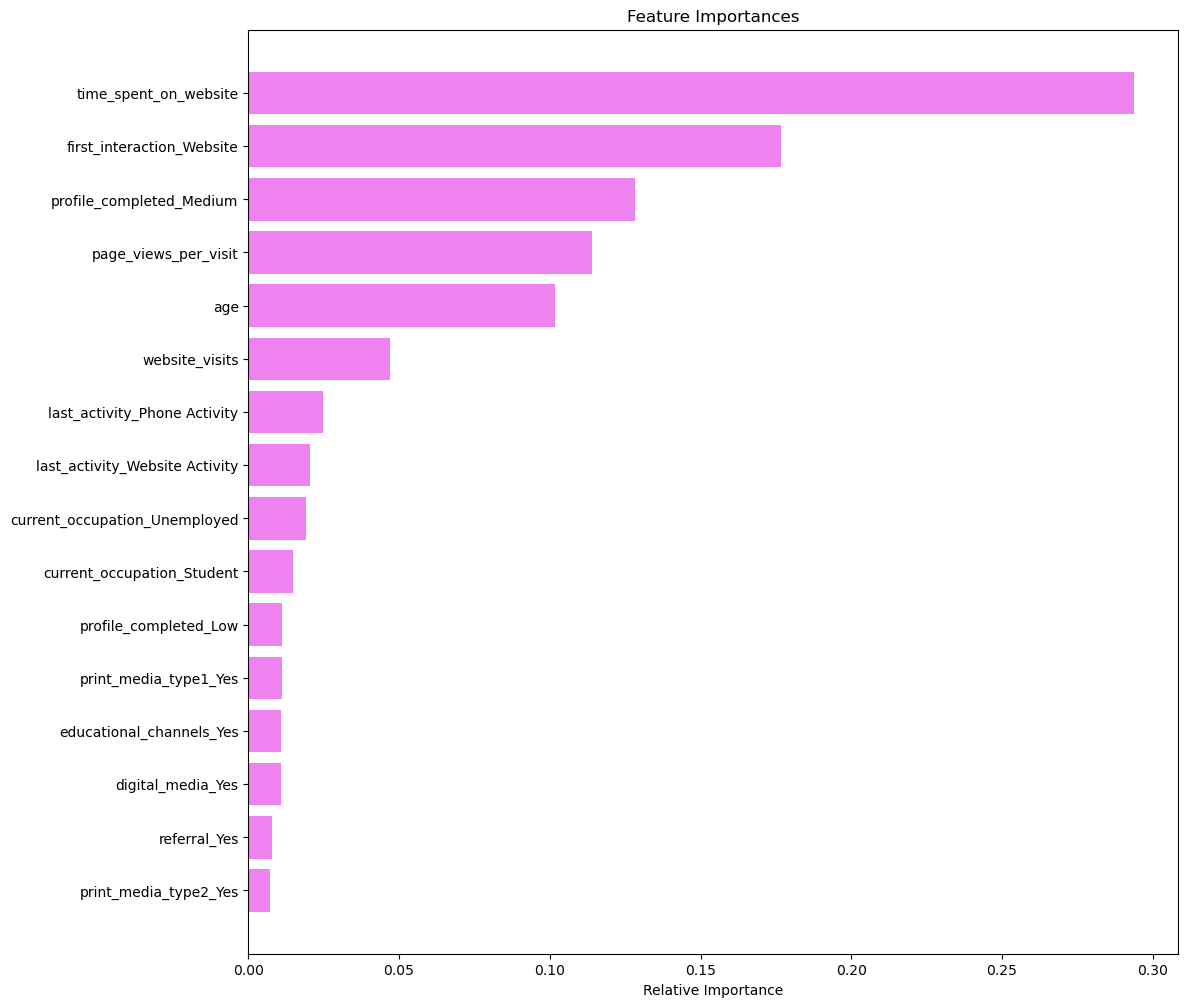

In [231]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

- All the features contribute to the model. Now we check the tuned classifier.

In [232]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [233]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1821
           1       0.67      0.88      0.76       779

    accuracy                           0.83      2600
   macro avg       0.80      0.85      0.82      2600
weighted avg       0.86      0.83      0.84      2600



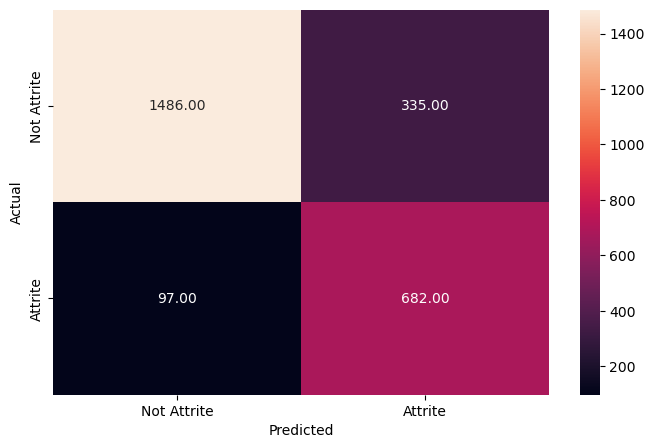

In [234]:
# Checking performance on the training dataset
y_train_pred_dt = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       779
           1       0.65      0.89      0.75       336

    accuracy                           0.82      1115
   macro avg       0.79      0.84      0.80      1115
weighted avg       0.85      0.82      0.83      1115



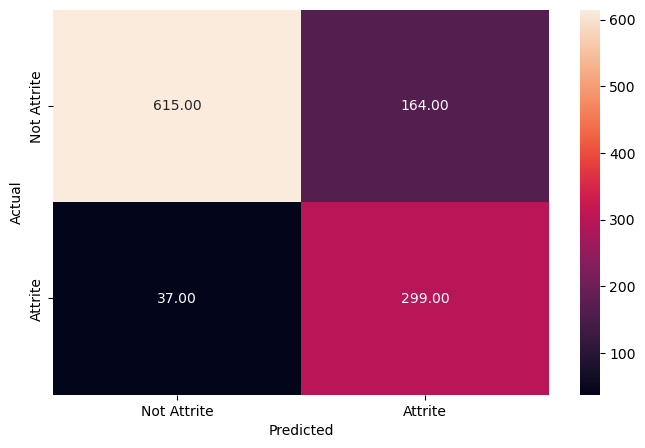

In [235]:
# Checking performance on the test dataset
y_test_pred_dt = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations**

- This classifier does not perform as well as the original one.

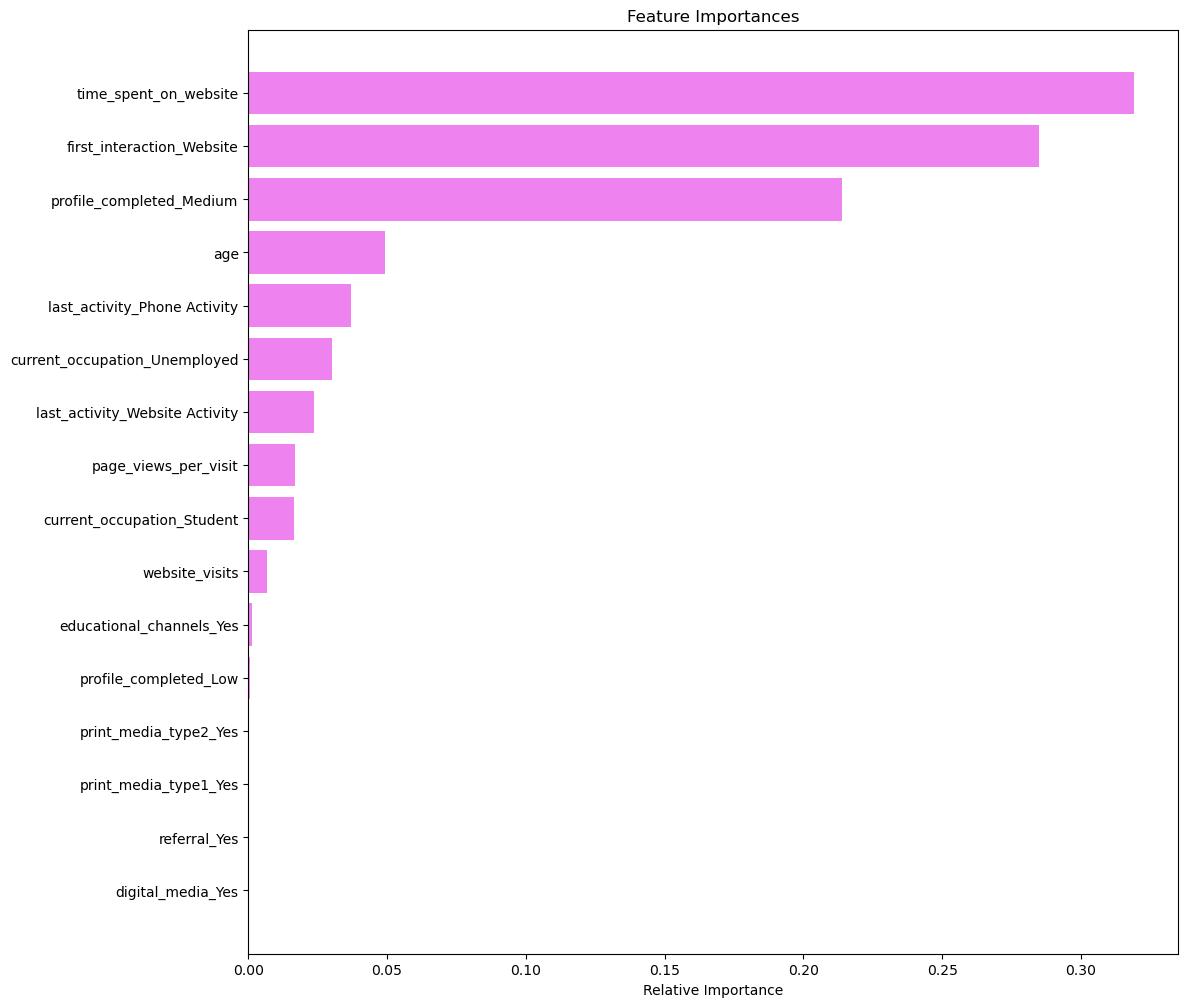

In [236]:
# Graphing feature importance of the model
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

- Profile completed, print media type1, print media type2, digital media, and referral do not contribute. Hence we prune them.

In [237]:
X_pruned_rf = df[['time_spent_on_website', 'first_interaction', 'profile_completed', 'age', 'current_occupation', 
                  'last_activity', 'page_views_per_visit', 'website_visits', 'educational_channels']]

In [238]:
X.columns   

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')

In [239]:
# Converting strings to integers
X_pruned_rf = pd.get_dummies(X_pruned_rf, drop_first=True) 

# Splitting the data in 70:30 ratio for train to test data
X_train_pruned_rf, X_test_pruned_rf, y_train, y_test = train_test_split(
    X_pruned_rf, Y, test_size=0.30, random_state=1
)

In [172]:
# Fitting the Random Forest classifier on the training data
rf_estimator_pruned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator_pruned.fit(X_train_pruned_rf, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00       779

    accuracy                           1.00      2600
   macro avg       1.00      1.00      1.00      2600
weighted avg       1.00      1.00      1.00      2600



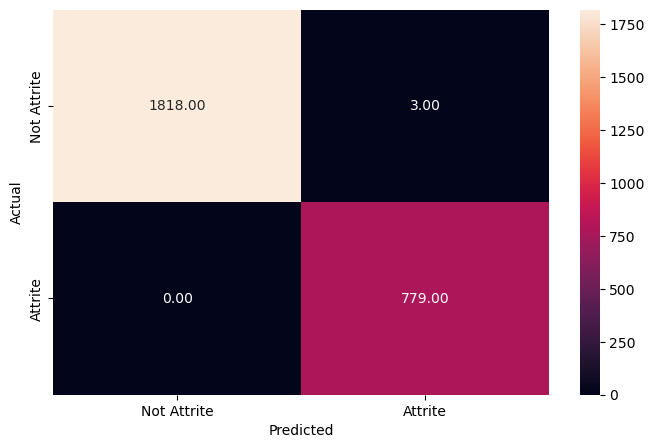

In [173]:
# Checking performance on the training dataset
y_train_pred = rf_estimator_pruned.predict(X_train_pruned_rf)
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       779
           1       0.79      0.72      0.76       336

    accuracy                           0.86      1115
   macro avg       0.84      0.82      0.83      1115
weighted avg       0.86      0.86      0.86      1115



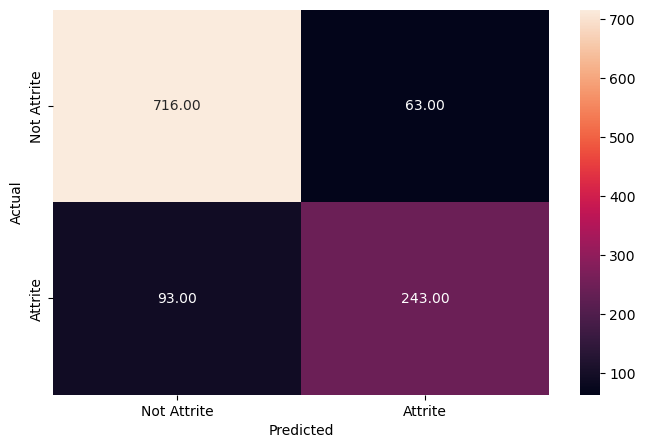

In [174]:
# Checking performance on the test dataset
y_test_pred = rf_estimator_pruned.predict(X_test_pruned_rf)
metrics_score(y_test, y_test_pred)

**Observations**

- Indeed, pruning results in better performance than without. With 9 features, the model performs as well as the original.

## Actionable Insights and Recommendations

- The professionals and unemployed tend to convert from leads to customers. Focused advertising to professionals can result in more customers.
- The professionals and unemployed have the median age of approximately 55. Advertising should be geared towards more aged groups.
- The website performs better than mobile app. Advertising of website than mobile app will result in more sales.
- The higher the completion of profile, the higher the conversion rate. The website should be engaging as to gather as much profile information as possible.
- The number of website visits does not seem to affect the status.
- The longer they stay on the website, the higher the conversion rate. The website design should be aimed at keeping the leads as long as possible.
- The number of pages per view does not seem to affect the status.
- The website activity has the highest rate of conversion than email and phone. Since the rate of conversion via phone is the lowest, activities via website or emails should be encouraged over via phone.
- For that purpose, a more engaging chatbot along with staffing more representatives will be helpful.
- More leads are generated from magazines than from newspaper or digital media. It could be because magazines are more effective sources of advertising or because there is more advertising on magazines. Hypothesis testing can be performed and reallocate advertising budgets accordingly.
- Leads from referrals have the highest rate of conversion. Ways to promote more referrals can be explored.
- Random Forest is a better classifier than Decision Trees.
- With pruning, we get similar performance metrics from a Random Forest Classifier with only 9 features. It is a computationally more effective classifier than without pruning.